<img src='img/logo.png' width=200>
<center>
    <br/>
    Otkrivanje zakonitosti u podacima 2019-2020
    <br/>
    Fakultet Organizacionih Nauka, 2020
    <br/>
    <h1>D1. Domaći zadatak 1</h1>
</center>

## Zahtevi domaćeg zadatka

1. Učitati i spojiti podatke
    1. Učitati podatke o transakcijama računa (folder `data` fajl `trans.csv`).
    2. Učitati podatke o korisnicima i povezati sa transakcijama (folder `data` fajl `client_accounts.csv`).
    3. Izračunati broj različitih računa koje korisnik poseduje.
    4. Napraviti pivot tabelu sume iznosa po tipu transakcije za svakog klijenta.
    5. Napraviti pivot tabelu sume iznosa po operaciji za svakog klijenta.
    6. Popuniti nedostajuće podatke.
    7. Rezultate iz C, D i E spojiti u jedan skup podataka nad kojim će se raditi klasterovanje od koraka 3.
2. RFM task
    1. Koristiti podatke o transakcijama računa (folder `data` fajl `trans.csv`) i povezati skup podataka sa podacima o korisnicima.
    2. Podeliti klijente (kolonu `client_id`) u 5 grupa i koristeći rfm_group_mapping funkciju (predavanja Segmentacija korisnika).
    3. Recency da se računa kao broj dana od 10.05.2019. godine.
    4. Frequency kao broj transakcija.
    5. Monetary kao prosečna vrednost transakcije.
    6. Prikazati prosečne vrednosti RFM kategorija po svakog grupi.
3. Normalizovati podatke na dva načina po izboru (npr. MaxMin, StandardScaler ili Normalizer). Za svaki od setova normalizovanih podataka uraditi sledeće:
    1. Identifikovati ekstremne vrednosti, karakterisati ih (zašto su ekstremne) i izbaciti iz skupa.
    2. Optimizovati K-means model po broju klastera koristeći SSE i Silhouette (dva optimizovana modela treba dobiti za svaku normalizaciju - ukupno četiri).
    3. Prikazati centroide na osnovu linijskog grafa, 
    4. Opisati svaki klaster u nekoliko rečenica (zapisati u Notebook-u).
    5. Odgovoriti na pitanje koji klaster model je prema vašem mišljenju bolji (optimizovan na osnovu na siluet indeksa ili SSE) i zašto.
4. Kreirati hijerarhijski model klasterovanja.
    1. Prikazati denrogram.
    2. Odrediti granicu preseka na osnovu dendrograma i kreirati klastere (opisati klastere u Notebook-u i opisati zašto ste izabrali baš taj broj klastera).

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
##Ucitavanje Trans.csv
dfTrans = pd.read_csv('data/trans.csv')

In [3]:
dfTrans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,9/10/2017 3:24,INCOME,DEPOSIT,700.0,700.0,NaN,NaN,NaN
1,171812,576,9/14/2017 3:24,INCOME,DEPOSIT,900.0,900.0,NaN,NaN,NaN
2,207264,704,9/21/2017 3:24,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,9/6/2017 3:24,INCOME,DEPOSIT,600.0,600.0,NaN,NaN,NaN
4,579373,1972,9/19/2017 3:41,INCOME,DEPOSIT,400.0,400.0,NaN,NaN,NaN


In [4]:
##Ucitavanje client_accounts.csv

dfClients= pd.read_csv('data/client_accounts.csv')

In [5]:
dfClients.head()

,account_id,client_id
0,1,1
1,2,2
2,3,2
3,4,3
4,5,3


In [6]:
## spajanje datesetova
podaci = dfTrans.merge(dfClients, left_on='account_id', right_on='account_id', how='right', indicator=True)

podaci

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,client_id,_merge
0,1.0,1,5/12/2018 3:54,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN,1,both
1,5.0,1,5/2/2018 4:37,INCOME,TRANSFER FROM ACCOUNT,3679.0,4679.0,NaN,AB,41403269.0,1,both
2,199.0,1,5/1/2018 7:24,INCOME,DEPOSIT,12600.0,17279.0,NaN,NaN,NaN,1,both
3,3530438.0,1,5/14/2018 9:21,INCOME,NaN,19.2,17298.2,UROK,NaN,NaN,1,both
4,6.0,1,5/15/2018 8:24,INCOME,TRANSFER FROM ACCOUNT,3679.0,20977.2,NaN,AB,41403269.0,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...
872446,NaN,13955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11349,right_only
872447,NaN,13956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11349,right_only
872448,NaN,13968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11359,right_only
872449,NaN,13971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11362,right_only


In [7]:
## C) Izračunati broj različitih računa koje korisnik poseduje.


number_of_accounts = dfClients.groupby('client_id')['account_id'].count().reset_index()
number_of_accounts.rename(columns={'account_id': 'num_accounts'}, inplace=True)
number_of_accounts

,client_id,num_accounts
0,1,1
1,2,2
2,3,2
3,4,1
4,5,1
...,...,...
4495,11333,1
4496,11349,2
4497,11359,1
4498,11362,1


In [8]:
## F) Popuniti nedostajuće podatke.
podaci.isna().sum()

trans_id        1540
account_id         0
date            1540
type            1540
operation     148089
amount          1540
balance         1540
k_symbol      394510
bank          639604
account       626548
client_id          0
_merge             0
dtype: int64

In [9]:
# popunjavamo nedostajuce vrednosti kolone account sa 0 zato sto ukoliko operacija nije transfer from account ili account transfer
# onda ta transakcija nema vrednost za account.
podaci.loc[(podaci['operation'] != 'TRANSFER FROM ACCOUNT') & (podaci['operation'] != 'ACCOUNT TRANSFER') & (podaci['operation'].notna()), 'account'] = podaci['account'].fillna(0)
podaci.isna().sum()

trans_id        1540
account_id         0
date            1540
type            1540
operation     148089
amount          1540
balance         1540
k_symbol      394510
bank          639604
account       148090
client_id          0
_merge             0
dtype: int64

In [10]:
# popunjavamo nedostajuce vrednosti kolone account sa 0 zato sto ukoliko operacija nije transfer from account ili account transfer
# onda ta transakcija nema vrednost za bank.
podaci.loc[(podaci['operation'] != 'TRANSFER FROM ACCOUNT' ) & ( podaci['operation'] != 'ACCOUNT TRANSFER') & ( podaci['operation'].notna()), 'bank'] = podaci['bank'].fillna(0)
podaci.isna().sum()

trans_id        1540
account_id         0
date            1540
type            1540
operation     148089
amount          1540
balance         1540
k_symbol      394510
bank          148090
account       148090
client_id          0
_merge             0
dtype: int64

In [11]:
# Ukoliko je operacija Transfer from account ili account transfer onda atribut banka treba da ima vrednosti a s obzirom da imamo
# nedostajuce vrednosti mi ih menjamo sa unknown
podaci.loc[(podaci['operation'] == 'TRANSFER FROM ACCOUNT' ) | ( podaci['operation'] == 'ACCOUNT TRANSFER'), 'bank'] = podaci['bank'].fillna('Unknown')
podaci.isna().sum()

trans_id        1540
account_id         0
date            1540
type            1540
operation     148089
amount          1540
balance         1540
k_symbol      394510
bank          148089
account       148090
client_id          0
_merge             0
dtype: int64

In [12]:
# Ukoliko je operacija Transfer from account ili account transfer onda atribut account treba da ima vrednosti a s obzirom da imamo
# nedostajuce vrednosti mi ih menjamo sa unknown
podaci.loc[(podaci['operation'] == 'TRANSFER FROM ACCOUNT' ) | ( podaci['operation'] == 'ACCOUNT TRANSFER'), 'account'] = podaci['account'].fillna('Unknown')
podaci.isna().sum()

trans_id        1540
account_id         0
date            1540
type            1540
operation     148089
amount          1540
balance         1540
k_symbol      394510
bank          148089
account       148089
client_id          0
_merge             0
dtype: int64

In [13]:
## klijenti koji nemaju transakcije, upisujemo vrednosti atributa da budu 0 jer to nisu nedostajuce vrednosti
null_condition = (podaci['account'].isna()) & (podaci['bank'].isna()) & (podaci['k_symbol'].isna()) & (podaci['operation'].isna()) & (podaci['trans_id'].isna()) & (podaci['date'].isna()) & (podaci['type'].isna()) & (podaci['amount'].isna()) & (podaci['balance'].isna())
podaci.loc[null_condition, ['operation', 'k_symbol', 'bank', 'account','trans_id','date','type','amount','balance']] = 0

podaci.isna().sum()


trans_id           0
account_id         0
date               0
type               0
operation     146549
amount             0
balance            0
k_symbol      392970
bank          146549
account       146549
client_id          0
_merge             0
dtype: int64

In [14]:
# Ne znamo ovu vrednost, tacnije to je nedostajuca vrednost
podaci['k_symbol'] = podaci['k_symbol'].fillna('Unknown')
podaci.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation     146549
amount             0
balance            0
k_symbol           0
bank          146549
account       146549
client_id          0
_merge             0
dtype: int64

In [15]:
# za operaciju trazimo vecinsku klasu a grupisali smo i po tipu jer neka ista operacija moze biti razlicitog tipa
count_transactions_by_type_operation = podaci.groupby(['type', 'operation'])['trans_id'].count().reset_index()
count_transactions_by_type_operation

,type,operation,trans_id
0,0,0,1540
1,CHOICE,CHOICE,10801
2,EXPENDITURE,ACCOUNT TRANSFER,176395
3,EXPENDITURE,CARD,6845
4,EXPENDITURE,CHOICE,345175
5,INCOME,DEPOSIT,128693
6,INCOME,TRANSFER FROM ACCOUNT,56453


In [16]:
#dodeli smo vecinske klase za atribut operation 
podaci.loc[(podaci['type'] == 'CHOICE') & (podaci['operation'].isna()), 'operation'] = 'CHOICE'
podaci.loc[(podaci['type'] == 'EXPENDITURE') & (podaci['operation'].isna()), 'operation'] = 'CHOICE'
podaci.loc[(podaci['type'] == 'INCOME') & (podaci['operation'].isna()), 'operation'] = 'DEPOSIT'
podaci.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation          0
amount             0
balance            0
k_symbol           0
bank          146549
account       146549
client_id          0
_merge             0
dtype: int64

In [17]:
# dakle bank i account su trenutno NA vrednosti, 
#s obzirom da smo izabrali za type dominantne klase CHOICE I DEPOSIT, 
#znamo da tip nije TRANSFER FROM ACCOUNT i ACCOUNT TRANSFER stoga ove vrednosti nisu nedostajuce i zato stavljamo 0.

podaci['bank'] = podaci['bank'].fillna(0)
podaci['account'] = podaci['account'].fillna(0)
podaci.isna().sum()

trans_id      0
account_id    0
date          0
type          0
operation     0
amount        0
balance       0
k_symbol      0
bank          0
account       0
client_id     0
_merge        0
dtype: int64

In [18]:
## D) Napraviti pivot tabelu sume iznosa po tipu transakcije za svakog klijenta.
pivot_table_amount = pd.pivot_table(podaci, values='amount', index='client_id', columns='type', aggfunc='sum', fill_value=0)
pivot_table_amount

type,0,CHOICE,EXPENDITURE,INCOME
client_id,,,,
1,0,0,180854.0,194267.9
2,0,217442,1456386.6,1769746.2
3,0,0,227071.8,289573.2
4,0,0,299499.6,347424.4
5,0,0,555872.0,629947.7
...,...,...,...,...
11333,0,0,0.0,0.0
11349,0,0,0.0,0.0
11359,0,0,0.0,0.0


In [19]:
## E) Napraviti pivot tabelu sume iznosa po operaciji za svakog klijenta.

pivot_table_operation = pd.pivot_table(podaci, values='amount', index='client_id', columns='operation', aggfunc='sum', fill_value=0)
pivot_table_operation

operation,0,ACCOUNT TRANSFER,CARD,CHOICE,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,,
1,0,98080.0,0,82774.0,28712.9,165555
2,0,618247.8,0,1055580.8,231810.2,1537936
3,0,136164.0,0,90907.8,5448.2,284125
4,0,185838.0,0,113661.6,7305.4,340119
5,0,97600.0,0,458272.0,629947.7,0
...,...,...,...,...,...,...
11333,0,0.0,0,0.0,0.0,0
11349,0,0.0,0,0.0,0.0,0
11359,0,0.0,0,0.0,0.0,0


In [20]:
print(len(pivot_table_operation))
print(len(pivot_table_amount))
print(len(number_of_accounts))

4500
4500
4500


In [21]:
# G)Rezultate iz C, D i E spojiti u jedan skup podataka nad kojim će se raditi klasterovanje od koraka 3.

podaci = number_of_accounts.merge(pivot_table_amount, left_on='client_id', right_on='client_id', how='inner', indicator=False)
podaci = podaci.merge(pivot_table_operation, left_on='client_id', right_on='client_id', how='inner', indicator=False)
podaci

,client_id,num_accounts,0_x,CHOICE_x,EXPENDITURE,INCOME,0_y,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
0,1,1,0,0,180854.0,194267.9,0,98080.0,0,82774.0,28712.9,165555
1,2,2,0,217442,1456386.6,1769746.2,0,618247.8,0,1055580.8,231810.2,1537936
2,3,2,0,0,227071.8,289573.2,0,136164.0,0,90907.8,5448.2,284125
3,4,1,0,0,299499.6,347424.4,0,185838.0,0,113661.6,7305.4,340119
4,5,1,0,0,555872.0,629947.7,0,97600.0,0,458272.0,629947.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,11333,1,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
4496,11349,2,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
4497,11359,1,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
4498,11362,1,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0


In [22]:
import numpy as np
import pandas as pd
## 2 A) Koristiti podatke o transakcijama računa (folder data fajl trans.csv) i povezati skup podataka sa podacima o korisnicima.
dfTrans = pd.read_csv('data/trans.csv')
dfClients= pd.read_csv('data/client_accounts.csv')

RFMpodaci = dfTrans.merge(dfClients, left_on='account_id', right_on='account_id', how='right', indicator=True)

RFMpodaci

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,client_id,_merge
0,1.0,1,5/12/2018 3:54,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN,1,both
1,5.0,1,5/2/2018 4:37,INCOME,TRANSFER FROM ACCOUNT,3679.0,4679.0,NaN,AB,41403269.0,1,both
2,199.0,1,5/1/2018 7:24,INCOME,DEPOSIT,12600.0,17279.0,NaN,NaN,NaN,1,both
3,3530438.0,1,5/14/2018 9:21,INCOME,NaN,19.2,17298.2,UROK,NaN,NaN,1,both
4,6.0,1,5/15/2018 8:24,INCOME,TRANSFER FROM ACCOUNT,3679.0,20977.2,NaN,AB,41403269.0,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...
872446,NaN,13955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11349,right_only
872447,NaN,13956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11349,right_only
872448,NaN,13968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11359,right_only
872449,NaN,13971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11362,right_only


In [23]:
RFMpodaci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872451 entries, 0 to 872450
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   trans_id    870911 non-null  float64 
 1   account_id  872451 non-null  int64   
 2   date        870911 non-null  object  
 3   type        870911 non-null  object  
 4   operation   724362 non-null  object  
 5   amount      870911 non-null  float64 
 6   balance     870911 non-null  float64 
 7   k_symbol    477941 non-null  object  
 8   bank        232847 non-null  object  
 9   account     245903 non-null  float64 
 10  client_id   872451 non-null  int64   
 11  _merge      872451 non-null  category
dtypes: category(1), float64(4), int64(2), object(5)
memory usage: 74.1+ MB


In [24]:
RFMpodaci['date'] = pd.to_datetime(RFMpodaci['date'])
RFMpodaci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872451 entries, 0 to 872450
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   trans_id    870911 non-null  float64       
 1   account_id  872451 non-null  int64         
 2   date        870911 non-null  datetime64[ns]
 3   type        870911 non-null  object        
 4   operation   724362 non-null  object        
 5   amount      870911 non-null  float64       
 6   balance     870911 non-null  float64       
 7   k_symbol    477941 non-null  object        
 8   bank        232847 non-null  object        
 9   account     245903 non-null  float64       
 10  client_id   872451 non-null  int64         
 11  _merge      872451 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 74.1+ MB


In [25]:
## 2 B) Podeliti klijente (kolonu client_id) u 5 grupa i koristeći rfm_group_mapping funkciju (predavanja Segmentacija korisnika).

RFMklijenti= RFMpodaci.groupby('client_id').agg({'date': 'max', 'amount': ['sum', 'count'] })
RFMklijenti.head()

date     amount      
                          max        sum count
client_id                                     
1         2019-05-08 13:57:00   375121.9   238
2         2019-05-09 16:44:00  3443574.8   592
3         2019-05-08 14:37:00   516645.0   266
4         2019-05-06 15:37:00   646924.0   244
5         2019-05-05 14:14:00  1185819.7   128

In [26]:
RFMklijenti.columns = ['-'.join(x) for x in RFMklijenti.columns]

In [27]:
RFMklijenti.head()

,date-max,amount-sum,amount-count
client_id,,,
1,2019-05-08 13:57:00,375121.9,238
2,2019-05-09 16:44:00,3443574.8,592
3,2019-05-08 14:37:00,516645.0,266
4,2019-05-06 15:37:00,646924.0,244
5,2019-05-05 14:14:00,1185819.7,128


In [28]:
from datetime import datetime, timedelta

today = datetime.strptime('2019-05-10', '%Y-%m-%d')
RFMklijenti['diff_date'] = RFMklijenti['date-max'].apply(lambda x: (today - x).seconds/60)

In [29]:
RFMklijenti.head()

,date-max,amount-sum,amount-count,diff_date
client_id,,,,
1,2019-05-08 13:57:00,375121.9,238,603.0
2,2019-05-09 16:44:00,3443574.8,592,436.0
3,2019-05-08 14:37:00,516645.0,266,563.0
4,2019-05-06 15:37:00,646924.0,244,503.0
5,2019-05-05 14:14:00,1185819.7,128,586.0


In [30]:
RFMklijenti['diff_date'] = 1/RFMklijenti['diff_date']
RFMklijenti.head()

,date-max,amount-sum,amount-count,diff_date
client_id,,,,
1,2019-05-08 13:57:00,375121.9,238,0.001658
2,2019-05-09 16:44:00,3443574.8,592,0.002294
3,2019-05-08 14:37:00,516645.0,266,0.001776
4,2019-05-06 15:37:00,646924.0,244,0.001988
5,2019-05-05 14:14:00,1185819.7,128,0.001706


In [31]:
RFMklijenti['Recency'] = pd.qcut(RFMklijenti['diff_date'], q=5, labels=False) + 1

In [32]:
RFMklijenti.head()

,date-max,amount-sum,amount-count,diff_date,Recency
client_id,,,,,
1,2019-05-08 13:57:00,375121.9,238,0.001658,2.0
2,2019-05-09 16:44:00,3443574.8,592,0.002294,4.0
3,2019-05-08 14:37:00,516645.0,266,0.001776,3.0
4,2019-05-06 15:37:00,646924.0,244,0.001988,3.0
5,2019-05-05 14:14:00,1185819.7,128,0.001706,3.0


In [33]:
## pravimo prosecnu vrednost transakcije 
RFMklijenti['avg-trans'] = RFMklijenti['amount-sum']/RFMklijenti['amount-count']
RFMklijenti

,date-max,amount-sum,amount-count,diff_date,Recency,avg-trans
client_id,,,,,,
1,2019-05-08 13:57:00,375121.9,238,0.001658,2.0,1576.142437
2,2019-05-09 16:44:00,3443574.8,592,0.002294,4.0,5816.849324
3,2019-05-08 14:37:00,516645.0,266,0.001776,3.0,1942.274436
4,2019-05-06 15:37:00,646924.0,244,0.001988,3.0,2651.327869
5,2019-05-05 14:14:00,1185819.7,128,0.001706,3.0,9264.216406
...,...,...,...,...,...,...
11333,NaT,0.0,0,NaN,NaN,NaN
11349,NaT,0.0,0,NaN,NaN,NaN
11359,NaT,0.0,0,NaN,NaN,NaN


In [34]:
RFMklijenti['Frequency'] = pd.qcut(RFMklijenti['amount-count'], q=5, labels=False, duplicates='drop') + 1
RFMklijenti['Monetary'] = pd.qcut(RFMklijenti['avg-trans'], q=5, labels=False, duplicates='drop') + 1
RFMklijenti.head()

,date-max,amount-sum,amount-count,diff_date,Recency,avg-trans,Frequency,Monetary
client_id,,,,,,,,
1,2019-05-08 13:57:00,375121.9,238,0.001658,2.0,1576.142437,3,1.0
2,2019-05-09 16:44:00,3443574.8,592,0.002294,4.0,5816.849324,4,4.0
3,2019-05-08 14:37:00,516645.0,266,0.001776,3.0,1942.274436,3,1.0
4,2019-05-06 15:37:00,646924.0,244,0.001988,3.0,2651.327869,3,2.0
5,2019-05-05 14:14:00,1185819.7,128,0.001706,3.0,9264.216406,2,5.0


In [35]:
# RFM se dobije tako sto se pomnoze Recency,Monetary,Frequency
RFMklijenti['RFM'] = RFMklijenti[['Recency', 'Frequency', 'Monetary']].agg('prod', axis=1)
RFMklijenti

,date-max,amount-sum,amount-count,diff_date,Recency,avg-trans,Frequency,Monetary,RFM
client_id,,,,,,,,,
1,2019-05-08 13:57:00,375121.9,238,0.001658,2.0,1576.142437,3,1.0,6.0
2,2019-05-09 16:44:00,3443574.8,592,0.002294,4.0,5816.849324,4,4.0,64.0
3,2019-05-08 14:37:00,516645.0,266,0.001776,3.0,1942.274436,3,1.0,9.0
4,2019-05-06 15:37:00,646924.0,244,0.001988,3.0,2651.327869,3,2.0,18.0
5,2019-05-05 14:14:00,1185819.7,128,0.001706,3.0,9264.216406,2,5.0,30.0
...,...,...,...,...,...,...,...,...,...
11333,NaT,0.0,0,NaN,NaN,NaN,1,NaN,1.0
11349,NaT,0.0,0,NaN,NaN,NaN,1,NaN,1.0
11359,NaT,0.0,0,NaN,NaN,NaN,1,NaN,1.0


In [36]:
#  0-1 - Neaktivni klijenti - ovi klijenti imaju sve tri osobine vrednost 1,
#  2-13 - Slabo aktivni klijenti - ovi klijenti imaju neke osobine slabe (vrednost 1), a najviše mogu da imaju sve osobine 2,
#  14-35 - Prosečni klijenti - prema svim osobinama mogu da imaju najviše vrednost 3, može se desiti da kompenzuju lošu osobinu sa nekom dobrom.
#  36-80 - Nadprosečni klijenti - pokazuju vrlo dobro ponašanje po osobinama.
#  81-125 - Najbolji klijenti (VIP) koji su najbolji po svim osobinama.

RFMklijenti['RFM Cluster'] = pd.cut(RFMklijenti['RFM'], bins=[0, 1, 13, 35, 80, 125], labels=False) + 1
print(RFMklijenti['RFM Cluster'].unique())
RFMklijenti

[2 4 3 1 5]


,date-max,amount-sum,amount-count,diff_date,Recency,avg-trans,Frequency,Monetary,RFM,RFM Cluster
client_id,,,,,,,,,,
1,2019-05-08 13:57:00,375121.9,238,0.001658,2.0,1576.142437,3,1.0,6.0,2
2,2019-05-09 16:44:00,3443574.8,592,0.002294,4.0,5816.849324,4,4.0,64.0,4
3,2019-05-08 14:37:00,516645.0,266,0.001776,3.0,1942.274436,3,1.0,9.0,2
4,2019-05-06 15:37:00,646924.0,244,0.001988,3.0,2651.327869,3,2.0,18.0,3
5,2019-05-05 14:14:00,1185819.7,128,0.001706,3.0,9264.216406,2,5.0,30.0,3
...,...,...,...,...,...,...,...,...,...,...
11333,NaT,0.0,0,NaN,NaN,NaN,1,NaN,1.0,1
11349,NaT,0.0,0,NaN,NaN,NaN,1,NaN,1.0,1
11359,NaT,0.0,0,NaN,NaN,NaN,1,NaN,1.0,1


In [37]:
# definisanje rfm group mapping funkcije
import math
def rfm_group_mapping(R, F, M):
    if (math.isnan(R)) & (F == 1) & (math.isnan(M)):
        return 'Student'
    elif (R <=2) & (F <= 2) & (M <= 2):
        return 'Slabo aktivni klijenti'
    elif (R >=3 ) & (F >= 4) & (M < 4):
        return 'Lojalni klijenti'
    elif (R >=4 ) & (F >= 4) & (M >= 4 ):
        return 'Zlatni klijenti'
    else: 
        return 'Prosečni klijenti'

In [38]:
RFMklijenti['RFM Group'] = RFMklijenti.apply(lambda x: rfm_group_mapping(x['Recency'], x['Frequency'], x['Monetary']), axis=1)
RFMklijenti

,date-max,amount-sum,amount-count,diff_date,Recency,avg-trans,Frequency,Monetary,RFM,RFM Cluster,RFM Group
client_id,,,,,,,,,,,
1,2019-05-08 13:57:00,375121.9,238,0.001658,2.0,1576.142437,3,1.0,6.0,2,Prosečni klijenti
2,2019-05-09 16:44:00,3443574.8,592,0.002294,4.0,5816.849324,4,4.0,64.0,4,Zlatni klijenti
3,2019-05-08 14:37:00,516645.0,266,0.001776,3.0,1942.274436,3,1.0,9.0,2,Prosečni klijenti
4,2019-05-06 15:37:00,646924.0,244,0.001988,3.0,2651.327869,3,2.0,18.0,3,Prosečni klijenti
5,2019-05-05 14:14:00,1185819.7,128,0.001706,3.0,9264.216406,2,5.0,30.0,3,Prosečni klijenti
...,...,...,...,...,...,...,...,...,...,...,...
11333,NaT,0.0,0,NaN,NaN,NaN,1,NaN,1.0,1,Student
11349,NaT,0.0,0,NaN,NaN,NaN,1,NaN,1.0,1,Student
11359,NaT,0.0,0,NaN,NaN,NaN,1,NaN,1.0,1,Student


In [39]:
RFMklijenti['RFM Group'].unique()

array(['Prosečni klijenti', 'Zlatni klijenti', 'Lojalni klijenti',
       'Slabo aktivni klijenti', 'Student'], dtype=object)

In [40]:
#Prikazati prosečne vrednosti RFM kategorija po svakog grupi.
RFMklijenti.groupby('RFM Group')[['RFM Cluster']].agg(['mean'])

,RFM Cluster
,mean
RFM Group,
Lojalni klijenti,3.421212
Prosečni klijenti,2.762760
Slabo aktivni klijenti,1.882759
Student,1.000000
Zlatni klijenti,4.017647


In [41]:
## 3)
podaci

,client_id,num_accounts,0_x,CHOICE_x,EXPENDITURE,INCOME,0_y,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
0,1,1,0,0,180854.0,194267.9,0,98080.0,0,82774.0,28712.9,165555
1,2,2,0,217442,1456386.6,1769746.2,0,618247.8,0,1055580.8,231810.2,1537936
2,3,2,0,0,227071.8,289573.2,0,136164.0,0,90907.8,5448.2,284125
3,4,1,0,0,299499.6,347424.4,0,185838.0,0,113661.6,7305.4,340119
4,5,1,0,0,555872.0,629947.7,0,97600.0,0,458272.0,629947.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,11333,1,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
4496,11349,2,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
4497,11359,1,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
4498,11362,1,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0


In [42]:
podaci.drop('0_x', axis=1, inplace=True)
podaci.drop('0_y', axis=1, inplace=True)

In [43]:
podaci

,client_id,num_accounts,CHOICE_x,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_y,DEPOSIT,TRANSFER FROM ACCOUNT
0,1,1,0,180854.0,194267.9,98080.0,0,82774.0,28712.9,165555
1,2,2,217442,1456386.6,1769746.2,618247.8,0,1055580.8,231810.2,1537936
2,3,2,0,227071.8,289573.2,136164.0,0,90907.8,5448.2,284125
3,4,1,0,299499.6,347424.4,185838.0,0,113661.6,7305.4,340119
4,5,1,0,555872.0,629947.7,97600.0,0,458272.0,629947.7,0
...,...,...,...,...,...,...,...,...,...,...
4495,11333,1,0,0.0,0.0,0.0,0,0.0,0.0,0
4496,11349,2,0,0.0,0.0,0.0,0,0.0,0.0,0
4497,11359,1,0,0.0,0.0,0.0,0,0.0,0.0,0
4498,11362,1,0,0.0,0.0,0.0,0,0.0,0.0,0


In [44]:
podaci.rename(columns={'CHOICE_x': 'CHOICE-TYPE'}, inplace=True)
podaci.rename(columns={'CHOICE_y': 'CHOICE-OPERATION'}, inplace=True)

In [45]:
podaci

,client_id,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
0,1,1,0,180854.0,194267.9,98080.0,0,82774.0,28712.9,165555
1,2,2,217442,1456386.6,1769746.2,618247.8,0,1055580.8,231810.2,1537936
2,3,2,0,227071.8,289573.2,136164.0,0,90907.8,5448.2,284125
3,4,1,0,299499.6,347424.4,185838.0,0,113661.6,7305.4,340119
4,5,1,0,555872.0,629947.7,97600.0,0,458272.0,629947.7,0
...,...,...,...,...,...,...,...,...,...,...
4495,11333,1,0,0.0,0.0,0.0,0,0.0,0.0,0
4496,11349,2,0,0.0,0.0,0.0,0,0.0,0.0,0
4497,11359,1,0,0.0,0.0,0.0,0,0.0,0.0,0
4498,11362,1,0,0.0,0.0,0.0,0,0.0,0.0,0


In [46]:
# ne zelimo da radimo normalizaciju klijent id-a ,a zelimo da zadrzimo te vrednosti da bi znali koji je klijent u pitanju
podaci.set_index('client_id', inplace=True)
podaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,,,,,
1,1,0,180854.0,194267.9,98080.0,0,82774.0,28712.9,165555
2,2,217442,1456386.6,1769746.2,618247.8,0,1055580.8,231810.2,1537936
3,2,0,227071.8,289573.2,136164.0,0,90907.8,5448.2,284125
4,1,0,299499.6,347424.4,185838.0,0,113661.6,7305.4,340119
5,1,0,555872.0,629947.7,97600.0,0,458272.0,629947.7,0
...,...,...,...,...,...,...,...,...,...
11333,1,0,0.0,0.0,0.0,0,0.0,0.0,0
11349,2,0,0.0,0.0,0.0,0,0.0,0.0,0
11359,1,0,0.0,0.0,0.0,0,0.0,0.0,0


In [47]:
## 3) Normalizacija
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
from scipy import stats

In [48]:
scaler = MinMaxScaler()
scaler.fit(podaci)
MinMaxPodaci = scaler.transform(podaci)
MinMaxPodaci

array([[0.        , 0.        , 0.03616972, ..., 0.01492945, 0.0074671 ,
        0.04335682],
       [1.        , 0.27644927, 0.29126862, ..., 0.19038875, 0.06028473,
        0.40276658],
       [1.        , 0.        , 0.045413  , ..., 0.01639649, 0.00141686,
        0.07440885],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
standard_scaler = StandardScaler()
standard_scaler.fit(podaci)
StandardScalerPodaci = standard_scaler.transform(podaci)
StandardScalerPodaci

array([[-0.48921162, -0.34621762, -0.50155374, ..., -0.5367252 ,
        -0.62179699,  0.09164704],
       [ 2.04410517,  2.14889901,  1.55283144, ...,  1.13159241,
        -0.30732394,  3.63184705],
       [ 2.04410517, -0.34621762, -0.4271149 , ..., -0.52277612,
        -0.65781973,  0.39751073],
       ...,
       [-0.48921162, -0.34621762, -0.79283894, ..., -0.67867869,
        -0.66625565, -0.33541936],
       [-0.48921162, -0.34621762, -0.79283894, ..., -0.67867869,
        -0.66625565, -0.33541936],
       [-0.48921162, -0.34621762, -0.79283894, ..., -0.67867869,
        -0.66625565, -0.33541936]])

In [50]:
# prebacujemo normalizovane podatke u data frame
MinMaxPodaci = pd.DataFrame(MinMaxPodaci) 
MinMaxPodaci.columns = ['num_accounts','CHOICE-TYPE','EXPENDITURE','INCOME','ACCOUNT TRANSFER','CARD','CHOICE-OPERATION','DEPOSIT','TRANSFER FROM ACCOUNT']
StandardScalerPodaci = pd.DataFrame(StandardScalerPodaci) 
StandardScalerPodaci.columns = ['num_accounts','CHOICE-TYPE','EXPENDITURE','INCOME','ACCOUNT TRANSFER','CARD','CHOICE-OPERATION','DEPOSIT','TRANSFER FROM ACCOUNT']
MinMaxPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
0,0.0,0.000000,0.036170,0.032820,0.086932,0.0,0.014929,0.007467,0.043357
1,1.0,0.276449,0.291269,0.298986,0.547975,0.0,0.190389,0.060285,0.402767
2,1.0,0.000000,0.045413,0.048921,0.120687,0.0,0.016396,0.001417,0.074409
3,0.0,0.000000,0.059898,0.058695,0.164715,0.0,0.020500,0.001900,0.089073
4,0.0,0.000000,0.111171,0.106425,0.086506,0.0,0.082656,0.163825,0.000000
...,...,...,...,...,...,...,...,...,...
4495,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4496,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4497,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4498,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [51]:
StandardScalerPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
0,-0.489212,-0.346218,-0.501554,-0.518887,-0.152925,-0.273029,-0.536725,-0.621797,0.091647
1,2.044105,2.148899,1.552831,1.714401,3.003518,-0.273029,1.131592,-0.307324,3.631847
2,2.044105,-0.346218,-0.427115,-0.383789,0.078173,-0.273029,-0.522776,-0.657820,0.397511
3,-0.489212,-0.346218,-0.310462,-0.301783,0.379601,-0.273029,-0.483754,-0.654944,0.541953
4,-0.489212,-0.346218,0.102454,0.098702,-0.155838,-0.273029,0.107236,0.309147,-0.335419
...,...,...,...,...,...,...,...,...,...
4495,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419
4496,2.044105,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419
4497,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419
4498,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419


In [52]:
# trazicemo outlier-e prema Z scoru (Istovremeno radimo i za MinMax i za StandardScaler podatke)
ZminMax = np.abs(stats.zscore(MinMaxPodaci))
ZstandardScaler = np.abs(stats.zscore(StandardScalerPodaci))

In [53]:
ZminMax

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
0,0.489212,0.346218,0.501554,0.518887,0.152925,0.273029,0.536725,0.621797,0.091647
1,2.044105,2.148899,1.552831,1.714401,3.003518,0.273029,1.131592,0.307324,3.631847
2,2.044105,0.346218,0.427115,0.383789,0.078173,0.273029,0.522776,0.657820,0.397511
3,0.489212,0.346218,0.310462,0.301783,0.379601,0.273029,0.483754,0.654944,0.541953
4,0.489212,0.346218,0.102454,0.098702,0.155838,0.273029,0.107236,0.309147,0.335419
...,...,...,...,...,...,...,...,...,...
4495,0.489212,0.346218,0.792839,0.794267,0.748087,0.273029,0.678679,0.666256,0.335419
4496,2.044105,0.346218,0.792839,0.794267,0.748087,0.273029,0.678679,0.666256,0.335419
4497,0.489212,0.346218,0.792839,0.794267,0.748087,0.273029,0.678679,0.666256,0.335419
4498,0.489212,0.346218,0.792839,0.794267,0.748087,0.273029,0.678679,0.666256,0.335419


In [54]:
# bez obzira koju smo normalizaciju koristili Z skorovi su isti.
ZstandardScaler

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
0,0.489212,0.346218,0.501554,0.518887,0.152925,0.273029,0.536725,0.621797,0.091647
1,2.044105,2.148899,1.552831,1.714401,3.003518,0.273029,1.131592,0.307324,3.631847
2,2.044105,0.346218,0.427115,0.383789,0.078173,0.273029,0.522776,0.657820,0.397511
3,0.489212,0.346218,0.310462,0.301783,0.379601,0.273029,0.483754,0.654944,0.541953
4,0.489212,0.346218,0.102454,0.098702,0.155838,0.273029,0.107236,0.309147,0.335419
...,...,...,...,...,...,...,...,...,...
4495,0.489212,0.346218,0.792839,0.794267,0.748087,0.273029,0.678679,0.666256,0.335419
4496,2.044105,0.346218,0.792839,0.794267,0.748087,0.273029,0.678679,0.666256,0.335419
4497,0.489212,0.346218,0.792839,0.794267,0.748087,0.273029,0.678679,0.666256,0.335419
4498,0.489212,0.346218,0.792839,0.794267,0.748087,0.273029,0.678679,0.666256,0.335419


In [55]:
# outlajeri  - MinMax (vraca tuple sa dva niza, prvi predstavlja redove a drugi kolone outlier-a)
Z3 = np.where(ZminMax>3)
Z3

(array([   1,    1,   12,   16,   16,   16,   16,   19,   19,   23,   24,
          24,   24,   24,   24,   26,   33,   37,   54,   54,   54,   54,
          55,   56,   56,   57,   59,   66,   66,   66,   67,   75,   76,
          76,   76,   76,   76,   76,   81,   83,   88,   96,   96,   98,
         140,  140,  144,  144,  152,  153,  155,  164,  164,  164,  164,
         164,  164,  171,  171,  171,  176,  186,  186,  190,  190,  208,
         208,  208,  208,  208,  226,  226,  226,  226,  226,  226,  244,
         265,  269,  269,  269,  269,  270,  270,  270,  270,  281,  282,
         282,  282,  282,  284,  291,  291,  303,  305,  308,  308,  311,
         313,  313,  313,  317,  320,  320,  320,  320,  322,  328,  332,
         332,  332,  332,  346,  346,  346,  346,  349,  349,  349,  349,
         349,  358,  358,  358,  358,  358,  358,  366,  372,  381,  381,
         381,  381,  381,  382,  384,  386,  388,  389,  392,  392,  392,
         392,  413,  413,  413,  415, 

In [56]:
# min max - prikaz redova
Z3[0]

array([   1,    1,   12,   16,   16,   16,   16,   19,   19,   23,   24,
         24,   24,   24,   24,   26,   33,   37,   54,   54,   54,   54,
         55,   56,   56,   57,   59,   66,   66,   66,   67,   75,   76,
         76,   76,   76,   76,   76,   81,   83,   88,   96,   96,   98,
        140,  140,  144,  144,  152,  153,  155,  164,  164,  164,  164,
        164,  164,  171,  171,  171,  176,  186,  186,  190,  190,  208,
        208,  208,  208,  208,  226,  226,  226,  226,  226,  226,  244,
        265,  269,  269,  269,  269,  270,  270,  270,  270,  281,  282,
        282,  282,  282,  284,  291,  291,  303,  305,  308,  308,  311,
        313,  313,  313,  317,  320,  320,  320,  320,  322,  328,  332,
        332,  332,  332,  346,  346,  346,  346,  349,  349,  349,  349,
        349,  358,  358,  358,  358,  358,  358,  366,  372,  381,  381,
        381,  381,  381,  382,  384,  386,  388,  389,  392,  392,  392,
        392,  413,  413,  413,  415,  428,  431,  4

In [57]:
# outlajeri - Standard scaler
Z3st = np.where(ZstandardScaler>3)
Z3st

(array([   1,    1,   12,   16,   16,   16,   16,   19,   19,   23,   24,
          24,   24,   24,   24,   26,   33,   37,   54,   54,   54,   54,
          55,   56,   56,   57,   59,   66,   66,   66,   67,   75,   76,
          76,   76,   76,   76,   76,   81,   83,   88,   96,   96,   98,
         140,  140,  144,  144,  152,  153,  155,  164,  164,  164,  164,
         164,  164,  171,  171,  171,  176,  186,  186,  190,  190,  208,
         208,  208,  208,  208,  226,  226,  226,  226,  226,  226,  244,
         265,  269,  269,  269,  269,  270,  270,  270,  270,  281,  282,
         282,  282,  282,  284,  291,  291,  303,  305,  308,  308,  311,
         313,  313,  313,  317,  320,  320,  320,  320,  322,  328,  332,
         332,  332,  332,  346,  346,  346,  346,  349,  349,  349,  349,
         349,  358,  358,  358,  358,  358,  358,  366,  372,  381,  381,
         381,  381,  381,  382,  384,  386,  388,  389,  392,  392,  392,
         392,  413,  413,  413,  415, 

In [58]:
Z3st[0]

array([   1,    1,   12,   16,   16,   16,   16,   19,   19,   23,   24,
         24,   24,   24,   24,   26,   33,   37,   54,   54,   54,   54,
         55,   56,   56,   57,   59,   66,   66,   66,   67,   75,   76,
         76,   76,   76,   76,   76,   81,   83,   88,   96,   96,   98,
        140,  140,  144,  144,  152,  153,  155,  164,  164,  164,  164,
        164,  164,  171,  171,  171,  176,  186,  186,  190,  190,  208,
        208,  208,  208,  208,  226,  226,  226,  226,  226,  226,  244,
        265,  269,  269,  269,  269,  270,  270,  270,  270,  281,  282,
        282,  282,  282,  284,  291,  291,  303,  305,  308,  308,  311,
        313,  313,  313,  317,  320,  320,  320,  320,  322,  328,  332,
        332,  332,  332,  346,  346,  346,  346,  349,  349,  349,  349,
        349,  358,  358,  358,  358,  358,  358,  366,  372,  381,  381,
        381,  381,  381,  382,  384,  386,  388,  389,  392,  392,  392,
        392,  413,  413,  413,  415,  428,  431,  4

In [59]:
#minmax - izdvaja sve jedinstvene vrednosti i broji koliko ima kojih. 
unique_elements, counts = np.unique(Z3[0], return_counts=True)
#Standard Scaler - izdvaja sve jedinstvene vrednosti i broji koliko ima kojih. 
unique_elementsSt, countsSt = np.unique(Z3st[0], return_counts=True)

In [60]:
#minmax 
for element, count in zip(unique_elements, counts):
    print(f"U {element}. redu se pojavljuje {count} autlajera.")

U 1. redu se pojavljuje 2 autlajera.
U 12. redu se pojavljuje 1 autlajera.
U 16. redu se pojavljuje 4 autlajera.
U 19. redu se pojavljuje 2 autlajera.
U 23. redu se pojavljuje 1 autlajera.
U 24. redu se pojavljuje 5 autlajera.
U 26. redu se pojavljuje 1 autlajera.
U 33. redu se pojavljuje 1 autlajera.
U 37. redu se pojavljuje 1 autlajera.
U 54. redu se pojavljuje 4 autlajera.
U 55. redu se pojavljuje 1 autlajera.
U 56. redu se pojavljuje 2 autlajera.
U 57. redu se pojavljuje 1 autlajera.
U 59. redu se pojavljuje 1 autlajera.
U 66. redu se pojavljuje 3 autlajera.
U 67. redu se pojavljuje 1 autlajera.
U 75. redu se pojavljuje 1 autlajera.
U 76. redu se pojavljuje 6 autlajera.
U 81. redu se pojavljuje 1 autlajera.
U 83. redu se pojavljuje 1 autlajera.
U 88. redu se pojavljuje 1 autlajera.
U 96. redu se pojavljuje 2 autlajera.
U 98. redu se pojavljuje 1 autlajera.
U 140. redu se pojavljuje 2 autlajera.
U 144. redu se pojavljuje 2 autlajera.
U 152. redu se pojavljuje 1 autlajera.
U 153. red

In [61]:
#StandardScaler
for element, count in zip(unique_elementsSt, countsSt):
    print(f"U {element}. redu se pojavljuje {count} autlajera.")

U 1. redu se pojavljuje 2 autlajera.
U 12. redu se pojavljuje 1 autlajera.
U 16. redu se pojavljuje 4 autlajera.
U 19. redu se pojavljuje 2 autlajera.
U 23. redu se pojavljuje 1 autlajera.
U 24. redu se pojavljuje 5 autlajera.
U 26. redu se pojavljuje 1 autlajera.
U 33. redu se pojavljuje 1 autlajera.
U 37. redu se pojavljuje 1 autlajera.
U 54. redu se pojavljuje 4 autlajera.
U 55. redu se pojavljuje 1 autlajera.
U 56. redu se pojavljuje 2 autlajera.
U 57. redu se pojavljuje 1 autlajera.
U 59. redu se pojavljuje 1 autlajera.
U 66. redu se pojavljuje 3 autlajera.
U 67. redu se pojavljuje 1 autlajera.
U 75. redu se pojavljuje 1 autlajera.
U 76. redu se pojavljuje 6 autlajera.
U 81. redu se pojavljuje 1 autlajera.
U 83. redu se pojavljuje 1 autlajera.
U 88. redu se pojavljuje 1 autlajera.
U 96. redu se pojavljuje 2 autlajera.
U 98. redu se pojavljuje 1 autlajera.
U 140. redu se pojavljuje 2 autlajera.
U 144. redu se pojavljuje 2 autlajera.
U 152. redu se pojavljuje 1 autlajera.
U 153. red

In [62]:
## ovo vraca redne brojeve redove koje imaju vise od 4 autlajera i njih cemo izbaciti (MINMAX)
zaIzbacivanje=unique_elements[counts >= 4]
zaIzbacivanje

array([  16,   24,   54,   76,  164,  208,  226,  269,  270,  282,  320,
        332,  346,  349,  358,  381,  392,  455,  494,  572,  582,  646,
        669,  683,  684,  710,  797,  816,  821,  897,  992, 1023, 1065,
       1144, 1260, 1330, 1334, 1351, 1374, 1398, 1418, 1439, 1664, 1703,
       1741, 1742, 1749, 1760, 1789, 1818, 1865, 1896, 1938, 1951, 1987,
       2068, 2083, 2158, 2168, 2212, 2230, 2278, 2285, 2291, 2293, 2306,
       2307, 2311, 2332, 2389, 2402, 2454, 2571, 2589, 2654, 2678, 2681,
       2763, 2773, 2803, 2842, 2892, 2893, 2921, 2956, 2965, 2976, 3042,
       3174, 3350, 3402, 3404, 3553, 3735, 3968, 4038, 4121, 4232],
      dtype=int64)

In [63]:
## ovo vraca redne brojeve redove koje imaju vise od 4 autlajera i njih cemo izbaciti (STANDARD SCALER)
zaIzbacivanjeSt=unique_elementsSt[countsSt >= 4]
zaIzbacivanjeSt

array([  16,   24,   54,   76,  164,  208,  226,  269,  270,  282,  320,
        332,  346,  349,  358,  381,  392,  455,  494,  572,  582,  646,
        669,  683,  684,  710,  797,  816,  821,  897,  992, 1023, 1065,
       1144, 1260, 1330, 1334, 1351, 1374, 1398, 1418, 1439, 1664, 1703,
       1741, 1742, 1749, 1760, 1789, 1818, 1865, 1896, 1938, 1951, 1987,
       2068, 2083, 2158, 2168, 2212, 2230, 2278, 2285, 2291, 2293, 2306,
       2307, 2311, 2332, 2389, 2402, 2454, 2571, 2589, 2654, 2678, 2681,
       2763, 2773, 2803, 2842, 2892, 2893, 2921, 2956, 2965, 2976, 3042,
       3174, 3350, 3402, 3404, 3553, 3735, 3968, 4038, 4121, 4232],
      dtype=int64)

In [64]:
#(MINMAX) - postavljamo kolonu client_id da nam bude indeks. s obzirom da je ona vec index u tabeli podaci onda koristimo podaci.index
MinMaxPodaci.index = podaci.index
MinMaxPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,,,,,
1,0.0,0.000000,0.036170,0.032820,0.086932,0.0,0.014929,0.007467,0.043357
2,1.0,0.276449,0.291269,0.298986,0.547975,0.0,0.190389,0.060285,0.402767
3,1.0,0.000000,0.045413,0.048921,0.120687,0.0,0.016396,0.001417,0.074409
4,0.0,0.000000,0.059898,0.058695,0.164715,0.0,0.020500,0.001900,0.089073
5,0.0,0.000000,0.111171,0.106425,0.086506,0.0,0.082656,0.163825,0.000000
...,...,...,...,...,...,...,...,...,...
11333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
11349,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
11359,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [65]:
##(STANDARD SCALER) - postavljamo kolonu client_id da nam bude indeks. s obzirom da je ona vec index u tabeli podaci onda koristimo podaci.index
StandardScalerPodaci.index = podaci.index
StandardScalerPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,,,,,
1,-0.489212,-0.346218,-0.501554,-0.518887,-0.152925,-0.273029,-0.536725,-0.621797,0.091647
2,2.044105,2.148899,1.552831,1.714401,3.003518,-0.273029,1.131592,-0.307324,3.631847
3,2.044105,-0.346218,-0.427115,-0.383789,0.078173,-0.273029,-0.522776,-0.657820,0.397511
4,-0.489212,-0.346218,-0.310462,-0.301783,0.379601,-0.273029,-0.483754,-0.654944,0.541953
5,-0.489212,-0.346218,0.102454,0.098702,-0.155838,-0.273029,0.107236,0.309147,-0.335419
...,...,...,...,...,...,...,...,...,...
11333,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419
11349,2.044105,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419
11359,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419


In [66]:
# S obzirom da funkcija drop izbacuje na osnovu indexa, a mi imamo redni broj redova koje treba da izbacimo, onda moramo
# da izvucemo indekse za te redove da bismo ih prosledili funkciji drop. (MINMAX)
zaIzbacivanje= MinMaxPodaci.iloc[[16,   24,   54,   76,  164,  208,  226,  269,  270,  282,  320,
        332,  346,  349,  358,  381,  392,  455,  494,  572,  582,  646,
        669,  683,  684,  710,  797,  816,  821,  897,  992, 1023, 1065,
       1144, 1260, 1330, 1334, 1351, 1374, 1398, 1418, 1439, 1664, 1703,
       1741, 1742, 1749, 1760, 1789, 1818, 1865, 1896, 1938, 1951, 1987,
       2068, 2083, 2158, 2168, 2212, 2230, 2278, 2285, 2291, 2293, 2306,
       2307, 2311, 2332, 2389, 2402, 2454, 2571, 2589, 2654, 2678, 2681,
       2763, 2773, 2803, 2842, 2892, 2893, 2921, 2956, 2965, 2976, 3042,
       3174, 3350, 3402, 3404, 3553, 3735, 3968, 4038, 4121, 4232]].index


In [67]:
# S obzirom da funkcija drop izbacuje na osnovu indexa, a mi imamo redni broj redova koje treba da izbacimo, onda moramo
# da izvucemo indekse za te redove da bismo ih prosledili funkciji drop. (STANDARD SCALER)
zaIzbacivanjeSt= StandardScalerPodaci.iloc[[16,   24,   54,   76,  164,  208,  226,  269,  270,  282,  320,
        332,  346,  349,  358,  381,  392,  455,  494,  572,  582,  646,
        669,  683,  684,  710,  797,  816,  821,  897,  992, 1023, 1065,
       1144, 1260, 1330, 1334, 1351, 1374, 1398, 1418, 1439, 1664, 1703,
       1741, 1742, 1749, 1760, 1789, 1818, 1865, 1896, 1938, 1951, 1987,
       2068, 2083, 2158, 2168, 2212, 2230, 2278, 2285, 2291, 2293, 2306,
       2307, 2311, 2332, 2389, 2402, 2454, 2571, 2589, 2654, 2678, 2681,
       2763, 2773, 2803, 2842, 2892, 2893, 2921, 2956, 2965, 2976, 3042,
       3174, 3350, 3402, 3404, 3553, 3735, 3968, 4038, 4121, 4232]].index


In [68]:
# izbacivanje redova koji su outlajeri po 4 ili vise atributa (MINMAX)
MinMaxPodaci = MinMaxPodaci.drop(zaIzbacivanje, axis=0)
MinMaxPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,,,,,
1,0.0,0.000000,0.036170,0.032820,0.086932,0.0,0.014929,0.007467,0.043357
2,1.0,0.276449,0.291269,0.298986,0.547975,0.0,0.190389,0.060285,0.402767
3,1.0,0.000000,0.045413,0.048921,0.120687,0.0,0.016396,0.001417,0.074409
4,0.0,0.000000,0.059898,0.058695,0.164715,0.0,0.020500,0.001900,0.089073
5,0.0,0.000000,0.111171,0.106425,0.086506,0.0,0.082656,0.163825,0.000000
...,...,...,...,...,...,...,...,...,...
11333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
11349,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
11359,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [69]:
# izbacivanje redova koji su outlajeri po 4 ili vise atributa (STANDARDSACALER)
StandardScalerPodaci = StandardScalerPodaci.drop(zaIzbacivanjeSt, axis=0)
StandardScalerPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
client_id,,,,,,,,,
1,-0.489212,-0.346218,-0.501554,-0.518887,-0.152925,-0.273029,-0.536725,-0.621797,0.091647
2,2.044105,2.148899,1.552831,1.714401,3.003518,-0.273029,1.131592,-0.307324,3.631847
3,2.044105,-0.346218,-0.427115,-0.383789,0.078173,-0.273029,-0.522776,-0.657820,0.397511
4,-0.489212,-0.346218,-0.310462,-0.301783,0.379601,-0.273029,-0.483754,-0.654944,0.541953
5,-0.489212,-0.346218,0.102454,0.098702,-0.155838,-0.273029,0.107236,0.309147,-0.335419
...,...,...,...,...,...,...,...,...,...
11333,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419
11349,2.044105,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419
11359,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419


In [70]:
## B) kreiranje K means algoritma, 5 klastera s obzirom da smo RFM-u vrsili segmentaciju u 5 grupa
# random state postavlja pocetne centroide uvek na ista mesta
from sklearn.cluster import KMeans

kmeans_algoritam= KMeans(n_clusters = 5, max_iter = 100, random_state=42) 
print(kmeans_algoritam)

KMeans(max_iter=100, n_clusters=5, random_state=42)


In [71]:
### pravimo model na osnovu k means algoritma (MINMAX) 
model = kmeans_algoritam.fit(MinMaxPodaci)
klasteri = model.predict(MinMaxPodaci)

# Dodajemo kolonu za klaster (MINMAX)
MinMaxPodaci['Cluster'] = klasteri

In [72]:
MinMaxPodaci[MinMaxPodaci['Cluster']==1]


,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT,Cluster
client_id,,,,,,,,,,
2,1.0,0.276449,0.291269,0.298986,0.547975,0.000000,0.190389,0.060285,0.402767,1
12,1.0,0.000000,0.290627,0.259396,0.160647,0.000000,0.229411,0.399299,0.000000,1
13,1.0,0.606605,0.300797,0.364896,0.007147,0.000000,0.355875,0.561700,0.000000,1
29,1.0,0.052959,0.352309,0.326512,0.290326,0.000000,0.266162,0.502615,0.000000,1
48,1.0,0.000000,0.356617,0.324143,0.507209,0.000000,0.218400,0.498968,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
4448,1.0,0.357390,0.407958,0.388227,0.000000,0.000000,0.418617,0.597615,0.000000,1
4784,1.0,0.000000,0.172839,0.156991,0.315805,0.000000,0.091610,0.241663,0.000000,1
4999,1.0,0.000000,0.320006,0.278006,0.518116,0.000000,0.183163,0.427948,0.000000,1


In [73]:
# analiza 0 klastera
# klaster 0 -  To su osobe koje imaju 1 racun. Prilivi i odlivi su otrpilike jednaki i niski i najmanji. Studenti
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['TRANSFER FROM ACCOUNT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['num_accounts'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['ACCOUNT TRANSFER'].mean())

0.016987304696011257
0.03125963433605566
0.031265551014983295
0.03206706210829305
0.0
0.047822278806841756


In [74]:
# analiza 1 klastera
# klaster 1 - To su klijenti sa 2 racunom koje vrse uplatu depozita, imaju znacajne vrednosti transakcija 
# i u proseku imaju 7 puta veci priliv po depozitu nego uplate sa drugih racuna(Studenti koji ne zive sa roditeljima) 
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['TRANSFER FROM ACCOUNT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['num_accounts'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['ACCOUNT TRANSFER'].mean())

0.056451714210775404
0.366636933637385
0.27459417378032314
0.29055951199763913
1.0
0.30581383307552135


In [75]:
# analiza 2 klastera
# klaster 2 - To su klijenti sa 1 racuna, koji imaju znacajne vrednosti transakcija, 
#  koji nemaju transfere sa drugih racuna (Penzioneri,studenti koji imaju 2 naloga) 
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['TRANSFER FROM ACCOUNT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['num_accounts'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['ACCOUNT TRANSFER'].mean())

0.0
0.31944745061438795
0.2075218431078835
0.22118751976306328
0.0
0.22218628495888446


In [76]:
# analiza 3 klastera
## klaster 3 - To su klijenti koji imaju 2 racun, sve vrednosti su male. sto znaci da su ovo slabo aktivni klijenti.
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['TRANSFER FROM ACCOUNT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['num_accounts'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['ACCOUNT TRANSFER'].mean())

0.034296172129482196
0.06335023331721967
0.0632783581685
0.06413182421446524
1.0
0.09223787890612052


In [77]:
# analiza 4 klastera
## kalster 4 - To su klijenti sa 1 racunom, koji imaju znacajan broj transakcija 
# i kojima je glavni izvor prihoda uplate sa drugih racuna, 
# dok je depozit znacajno manji izvor prihoda. (privatna preduzeca,kompanije...)
print(MinMaxPodaci[MinMaxPodaci['Cluster']==4]['TRANSFER FROM ACCOUNT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==4]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==4]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==4]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==4]['num_accounts'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==4]['ACCOUNT TRANSFER'].mean())

0.37693821492974544
0.011580859894796468
0.25068438317369507
0.24311915901833198
0.0
0.27314700424411126


In [78]:
### pravimo model na osnovu k means algoritma (STANDARDSCALER) 
modelSt = kmeans_algoritam.fit(StandardScalerPodaci)
klasteriSt = modelSt.predict(StandardScalerPodaci)

# Dodajemo kolonu za klaster (STANDARDSCALER)
StandardScalerPodaci['Cluster'] = klasteriSt
StandardScalerPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT,Cluster
client_id,,,,,,,,,,
1,-0.489212,-0.346218,-0.501554,-0.518887,-0.152925,-0.273029,-0.536725,-0.621797,0.091647,1
2,2.044105,2.148899,1.552831,1.714401,3.003518,-0.273029,1.131592,-0.307324,3.631847,3
3,2.044105,-0.346218,-0.427115,-0.383789,0.078173,-0.273029,-0.522776,-0.657820,0.397511,0
4,-0.489212,-0.346218,-0.310462,-0.301783,0.379601,-0.273029,-0.483754,-0.654944,0.541953,1
5,-0.489212,-0.346218,0.102454,0.098702,-0.155838,-0.273029,0.107236,0.309147,-0.335419,1
...,...,...,...,...,...,...,...,...,...,...
11333,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,1
11349,2.044105,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,0
11359,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,1


In [79]:
StandardScalerPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT,Cluster
client_id,,,,,,,,,,
1,-0.489212,-0.346218,-0.501554,-0.518887,-0.152925,-0.273029,-0.536725,-0.621797,0.091647,1
2,2.044105,2.148899,1.552831,1.714401,3.003518,-0.273029,1.131592,-0.307324,3.631847,3
3,2.044105,-0.346218,-0.427115,-0.383789,0.078173,-0.273029,-0.522776,-0.657820,0.397511,0
4,-0.489212,-0.346218,-0.310462,-0.301783,0.379601,-0.273029,-0.483754,-0.654944,0.541953,1
5,-0.489212,-0.346218,0.102454,0.098702,-0.155838,-0.273029,0.107236,0.309147,-0.335419,1
...,...,...,...,...,...,...,...,...,...,...
11333,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,1
11349,2.044105,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,0
11359,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,1


In [80]:
# Dodeljujemo centre klastera novoj promenljivoj (MINMAX)
centroidi = model.cluster_centers_
centroidi

array([[ 2.04410517, -0.27154594, -0.24227968, -0.23676634, -0.04347367,
        -0.18896388, -0.28222686, -0.23844477, -0.03361679],
       [-0.48921162, -0.30854083, -0.48873002, -0.48861299, -0.36360849,
        -0.21115806, -0.45922182, -0.42895572, -0.17453406],
       [ 0.35652645,  0.67220198,  1.34359636,  1.31165411,  1.01243323,
        -0.03438481,  1.2457093 ,  1.59690274, -0.27349953],
       [ 0.12286492,  2.06184933,  1.26512188,  1.41770674,  1.13314149,
         0.16186795,  1.33152183, -0.50976635,  3.42919501],
       [ 0.27078342, -0.28181627,  1.08255068,  0.98343778,  0.72174595,
         4.37061927,  0.81301032,  1.21939156, -0.24185195]])

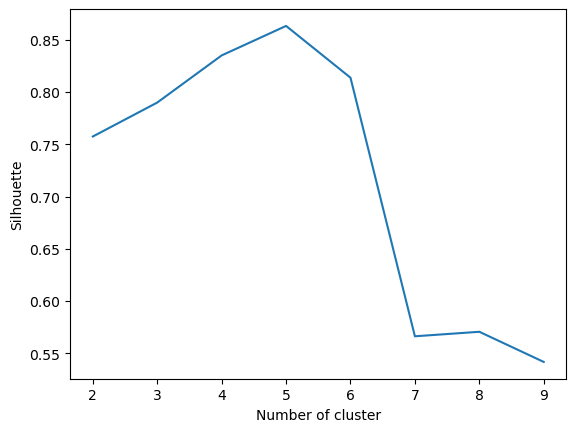

In [81]:
#silhouette score (MIN MAX )
from sklearn.metrics import silhouette_score
silhouette_score(MinMaxPodaci,klasteri)
silhouetteScore = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42).fit(MinMaxPodaci)
    cluster_labels = kmeans.fit_predict(MinMaxPodaci)
    silhouetteScore[k] = silhouette_score(MinMaxPodaci, cluster_labels)

plt.plot(list(silhouetteScore.keys()), list(silhouetteScore.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

#na osnovu grafika vidimo da je siluet skor najbolji u slucaju kada imamo 5 klastera, odnosno nas model je vec optimizovan.

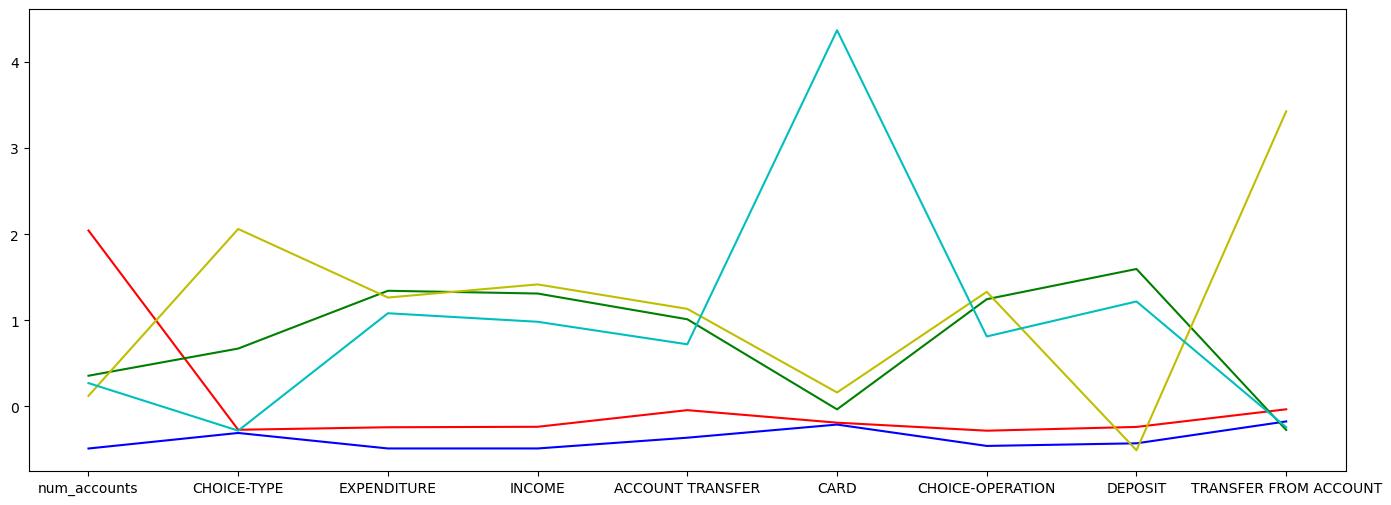

In [82]:
#prikaz centroida na linijskom grafu za vec optimizovani model sa MINMAX podacima
atributi = list(podaci.columns)

plt.close()
plt.rcParams['figure.figsize']=[17,6]
plt.plot(centroidi[0,:], c = 'r')
plt.plot(centroidi[1,:], c = 'b')
plt.plot(centroidi[2,:], c = 'g')
plt.plot(centroidi[3,:], c = 'y')
plt.plot(centroidi[4,:], c = 'c')
plt.xticks(list(range(9)), atributi)
plt.show()

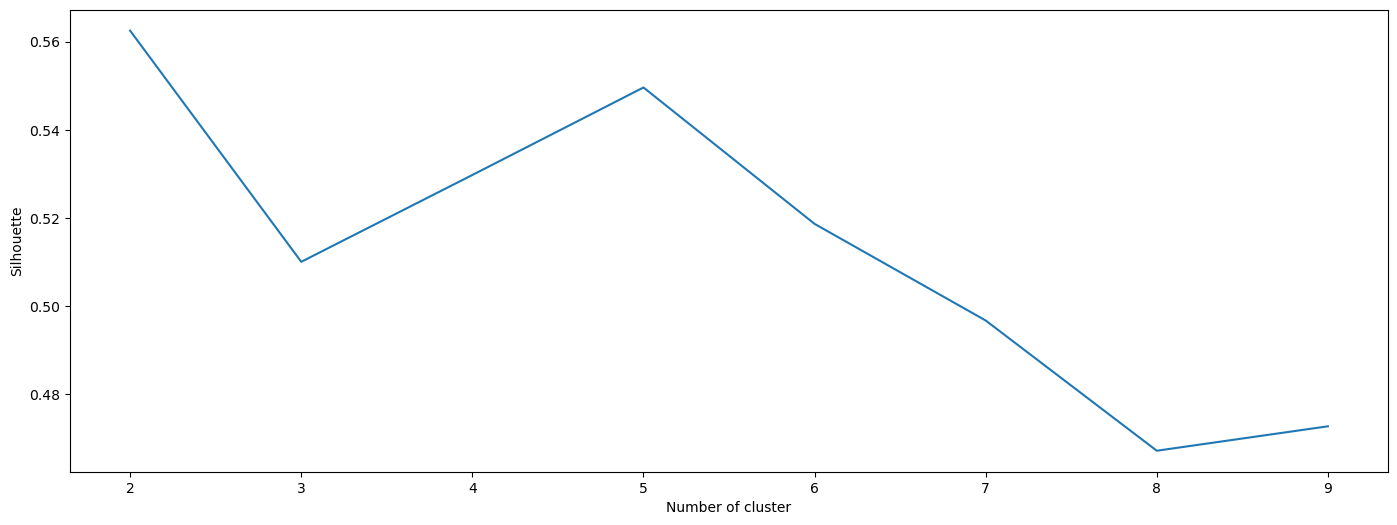

In [83]:
#silhouette_score - (STANDARD  SCALER)
silhouette_score(StandardScalerPodaci,klasteriSt)
silhouetteScoreSt = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42).fit(StandardScalerPodaci)
    cluster_labels = kmeans.fit_predict(StandardScalerPodaci)
    silhouetteScoreSt[k] = silhouette_score(StandardScalerPodaci, cluster_labels)

plt.plot(list(silhouetteScoreSt.keys()), list(silhouetteScoreSt.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

#na osnovu grafika vidimo da je siluet skor najbolji u slucaju kada imamo 2 klastera, odnosno nas model je vec optimizovan.

In [84]:
# algoritam sa optimizovanim brojem klastera prema Silhouette za StandardScalerPodatke
kmeans_algoritam_optimizovan_Silhouette= KMeans(n_clusters = 2, max_iter = 100,random_state=42)

### pravimo optimizovan model prema Silhouette parametru (StandardScalerPodaci) 
modelOptimizovanSt = kmeans_algoritam_optimizovan_Silhouette.fit(StandardScalerPodaci)
klasteriOptimizovaniSt = modelOptimizovanSt.predict(StandardScalerPodaci)

# Dodajemo kolonu za klaster (StandardScalerPodaci)
StandardScalerPodaci['Cluster'] = klasteriOptimizovaniSt
StandardScalerPodaci


,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT,Cluster
client_id,,,,,,,,,,
1,-0.489212,-0.346218,-0.501554,-0.518887,-0.152925,-0.273029,-0.536725,-0.621797,0.091647,0
2,2.044105,2.148899,1.552831,1.714401,3.003518,-0.273029,1.131592,-0.307324,3.631847,1
3,2.044105,-0.346218,-0.427115,-0.383789,0.078173,-0.273029,-0.522776,-0.657820,0.397511,0
4,-0.489212,-0.346218,-0.310462,-0.301783,0.379601,-0.273029,-0.483754,-0.654944,0.541953,0
5,-0.489212,-0.346218,0.102454,0.098702,-0.155838,-0.273029,0.107236,0.309147,-0.335419,0
...,...,...,...,...,...,...,...,...,...,...
11333,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,0
11349,2.044105,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,0
11359,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,0


In [85]:
# dakle vrednosti INCOME I EXPENDITURE koje su pozitivne predstavljaju uslov za prvi klaster a negativne za 0 klaster.
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==0]['INCOME'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==0]['EXPENDITURE'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==1]['INCOME'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==1]['EXPENDITURE'].mean())

-0.45701014140601676
-0.4582406313159152
1.2696343056084711
1.283140479064647


In [86]:
# Dodeljujemo centre klastera novoj promenljivoj (STANDARDSCALER)
centroidiOptimizovaniSt = modelOptimizovanSt.cluster_centers_
centroidiOptimizovaniSt

array([[-0.11932531, -0.30328495, -0.45796509, -0.45676602, -0.32378962,
        -0.20803862, -0.43699855, -0.40601003, -0.15480673,  0.85399129],
       [ 0.33934445,  0.73177287,  1.28214859,  1.26875553,  0.99376529,
         0.63810946,  1.18006108,  1.19669124,  0.31518466,  2.41065831]])

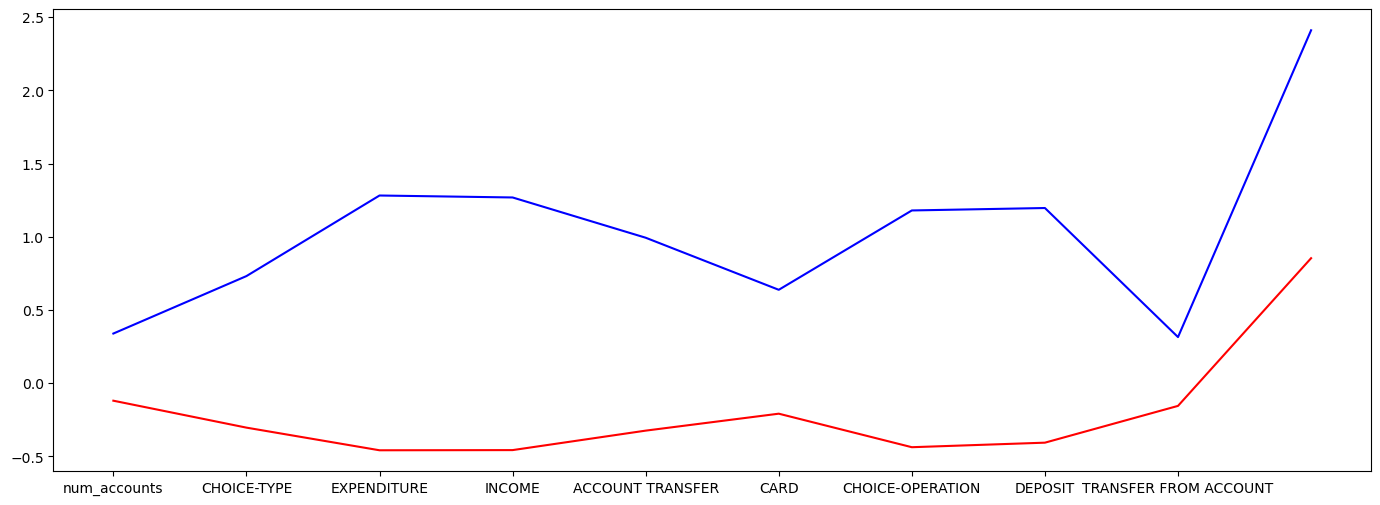

In [87]:
##prikaz centroida na linijskom grafu za vec optimizovani model sa STANDARDSCALER podacima
plt.close()
plt.rcParams['figure.figsize']=[17,6]
plt.plot(centroidiOptimizovaniSt[0,:], c = 'r')
plt.plot(centroidiOptimizovaniSt[1,:], c = 'b')
plt.xticks(list(range(9)), atributi)
plt.show()

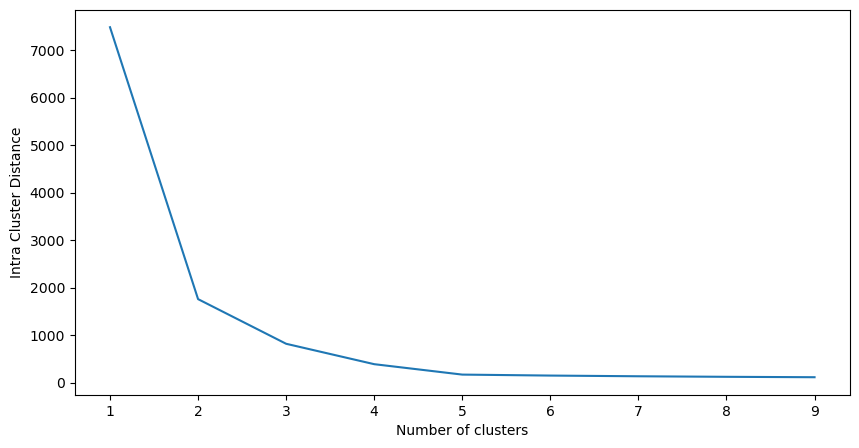

In [88]:
# SSE - (MIN MAX)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42).fit(MinMaxPodaci)
    cluster_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.close()
plt.rcParams['figure.figsize']=[10,5]
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")

plt.show()

# na osnovu lakat metode dolazimo do zakljucka da bi optimizovan model trebao da ima 2 klastera.

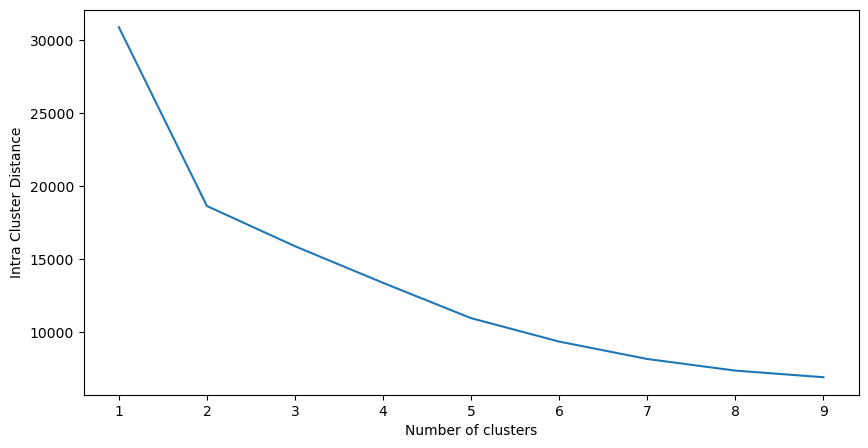

In [89]:
# SSE - (STANDARD SCALER)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100,random_state=42).fit(StandardScalerPodaci)
    cluster_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.close()
plt.rcParams['figure.figsize']=[10,5]
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")

plt.show()

# na osnovu lakat metode dolazimo do zakljucka da bi optimizovan model trebao da ima 2 klastera

In [90]:
# algoritam sa optimizovanim brojem klastera prema SSE
kmeans_algoritam_optimizovan_sse= KMeans(n_clusters = 2, max_iter = 100,random_state=42)

### pravimo optimizovan model prema SSE parametru (MINMAX) 
modelOptimizovan = kmeans_algoritam_optimizovan_sse.fit(MinMaxPodaci)
klasteriOptimizovani = modelOptimizovan.predict(MinMaxPodaci)

# Dodajemo kolonu za klaster (MINMAX)
MinMaxPodaci['Cluster'] = klasteriOptimizovani
MinMaxPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT,Cluster
client_id,,,,,,,,,,
1,0.0,0.000000,0.036170,0.032820,0.086932,0.0,0.014929,0.007467,0.043357,0
2,1.0,0.276449,0.291269,0.298986,0.547975,0.0,0.190389,0.060285,0.402767,0
3,1.0,0.000000,0.045413,0.048921,0.120687,0.0,0.016396,0.001417,0.074409,1
4,0.0,0.000000,0.059898,0.058695,0.164715,0.0,0.020500,0.001900,0.089073,0
5,0.0,0.000000,0.111171,0.106425,0.086506,0.0,0.082656,0.163825,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
11333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
11349,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1
11359,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0


In [91]:
# klaster 1 - ima mnogo vise transakcija nego klaster 0. U proseku tri puta su veci prilivi i odlivi.

print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['ACCOUNT TRANSFER'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['ACCOUNT TRANSFER'].mean())

0.05550428229625022
0.057816310017966784
0.0646676244985672
0.07352163092451489
0.15515151258744697
0.16190964603208424
0.17609287133397694


In [92]:
# centroidi za model koji je optimizovan prema SSE-u na MINMAX podacima
centroidiOptimizovani = modelOptimizovan.cluster_centers_
centroidiOptimizovani

array([[0.09961315, 0.01282621, 0.05781631, 0.05550428, 0.07352163,
        0.01203631, 0.03867096, 0.06466762, 0.02091848, 0.09961315],
       [0.39      , 0.06992428, 0.16190965, 0.15515151, 0.17609287,
        0.04074537, 0.11899038, 0.19186154, 0.04729995, 2.57      ]])

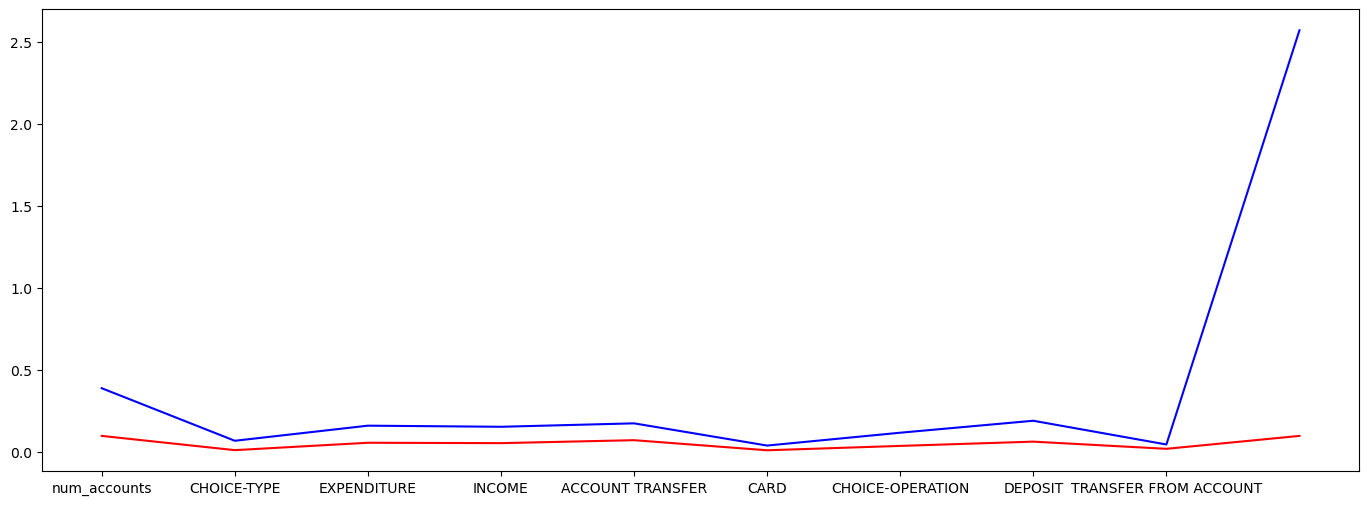

In [93]:
##prikaz centroida na linijskom grafu za novi optimizovani model na osnovu SSE sa 2 klastera na MINMAX podacima
plt.close()
plt.rcParams['figure.figsize']=[17,6]
plt.plot(centroidiOptimizovani[0,:], c = 'r')
plt.plot(centroidiOptimizovani[1,:], c = 'b')
plt.xticks(list(range(9)), atributi)
plt.show()

In [94]:
### pravimo optimizovan model prema SSE parametru (STANDARD SCALER) 
modelOptimizovanSt = kmeans_algoritam_optimizovan_sse.fit(StandardScalerPodaci)
klasteriOptimizovaniSt = modelOptimizovanSt.predict(StandardScalerPodaci)

# Dodajemo kolonu za klaster (STANDARD SCALER)
StandardScalerPodaci['Cluster'] = klasteriOptimizovaniSt
StandardScalerPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT,Cluster
client_id,,,,,,,,,,
1,-0.489212,-0.346218,-0.501554,-0.518887,-0.152925,-0.273029,-0.536725,-0.621797,0.091647,0
2,2.044105,2.148899,1.552831,1.714401,3.003518,-0.273029,1.131592,-0.307324,3.631847,1
3,2.044105,-0.346218,-0.427115,-0.383789,0.078173,-0.273029,-0.522776,-0.657820,0.397511,0
4,-0.489212,-0.346218,-0.310462,-0.301783,0.379601,-0.273029,-0.483754,-0.654944,0.541953,0
5,-0.489212,-0.346218,0.102454,0.098702,-0.155838,-0.273029,0.107236,0.309147,-0.335419,0
...,...,...,...,...,...,...,...,...,...,...
11333,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,0
11349,2.044105,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,0
11359,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,0


In [95]:
# U klasteru 1 su u proseku pozitivne vrednosti za atribute ispod,a negativne za kalster 0.

print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==0]['INCOME'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==0]['EXPENDITURE'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==0]['DEPOSIT'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==0]['ACCOUNT TRANSFER'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==1]['INCOME'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==1]['EXPENDITURE'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==1]['DEPOSIT'].mean())
print(StandardScalerPodaci[StandardScalerPodaci['Cluster']==1]['ACCOUNT TRANSFER'].mean())

-0.4763625549780595
-0.4777079497270073
-0.4254071807023944
-0.3466020461098976
1.2238214570933663
1.2367703851847598
1.1589092332783906
0.9854139483438352


In [96]:
# centroidi za model koji je optimizovan prema SSE-u na MINMAX podacima
centroidiOptimizovaniSt = modelOptimizovanSt.cluster_centers_
centroidiOptimizovaniSt

array([[-0.17142277, -0.30876186, -0.47770795, -0.47636255, -0.34660205,
        -0.19680969, -0.45263224, -0.42540718, -0.15815271,  0.00443787],
       [ 0.48247153,  0.68405585,  1.23677039,  1.22382146,  0.98541395,
         0.54715699,  1.12891918,  1.15890923,  0.2963588 ,  0.92172211]])

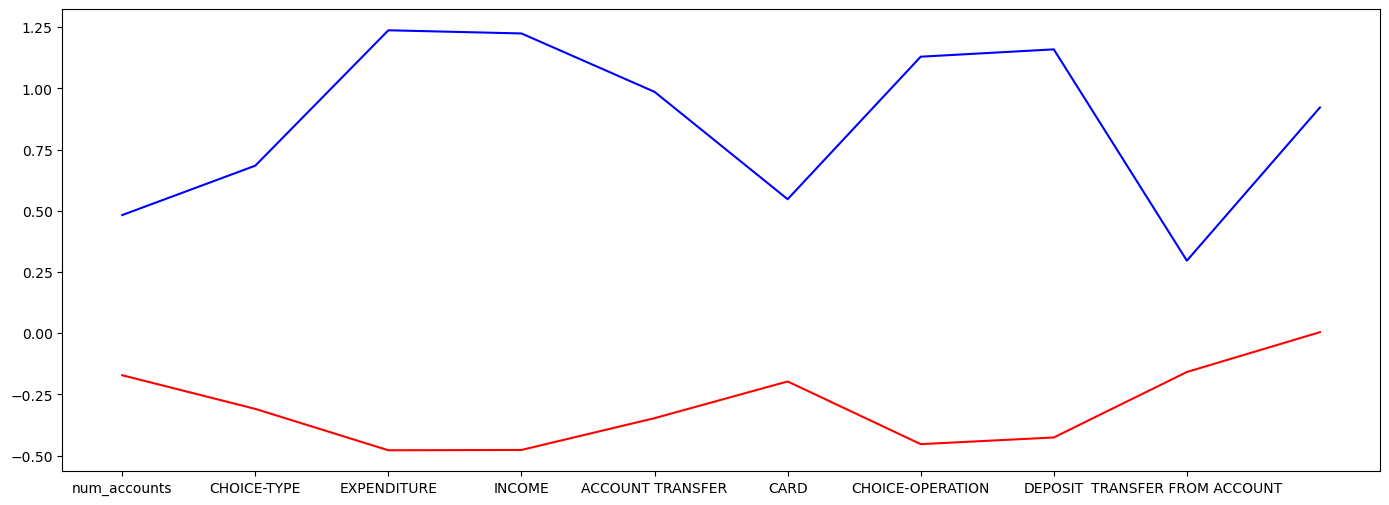

In [97]:
##prikaz centroida na linijskom grafu za novi optimizovani model na osnovu SSE sa 2 klastera na MINMAX podacima
plt.close()
plt.rcParams['figure.figsize']=[17,6]
plt.plot(centroidiOptimizovaniSt[0,:], c = 'r')
plt.plot(centroidiOptimizovaniSt[1,:], c = 'b')
plt.xticks(list(range(9)), atributi)
plt.show()

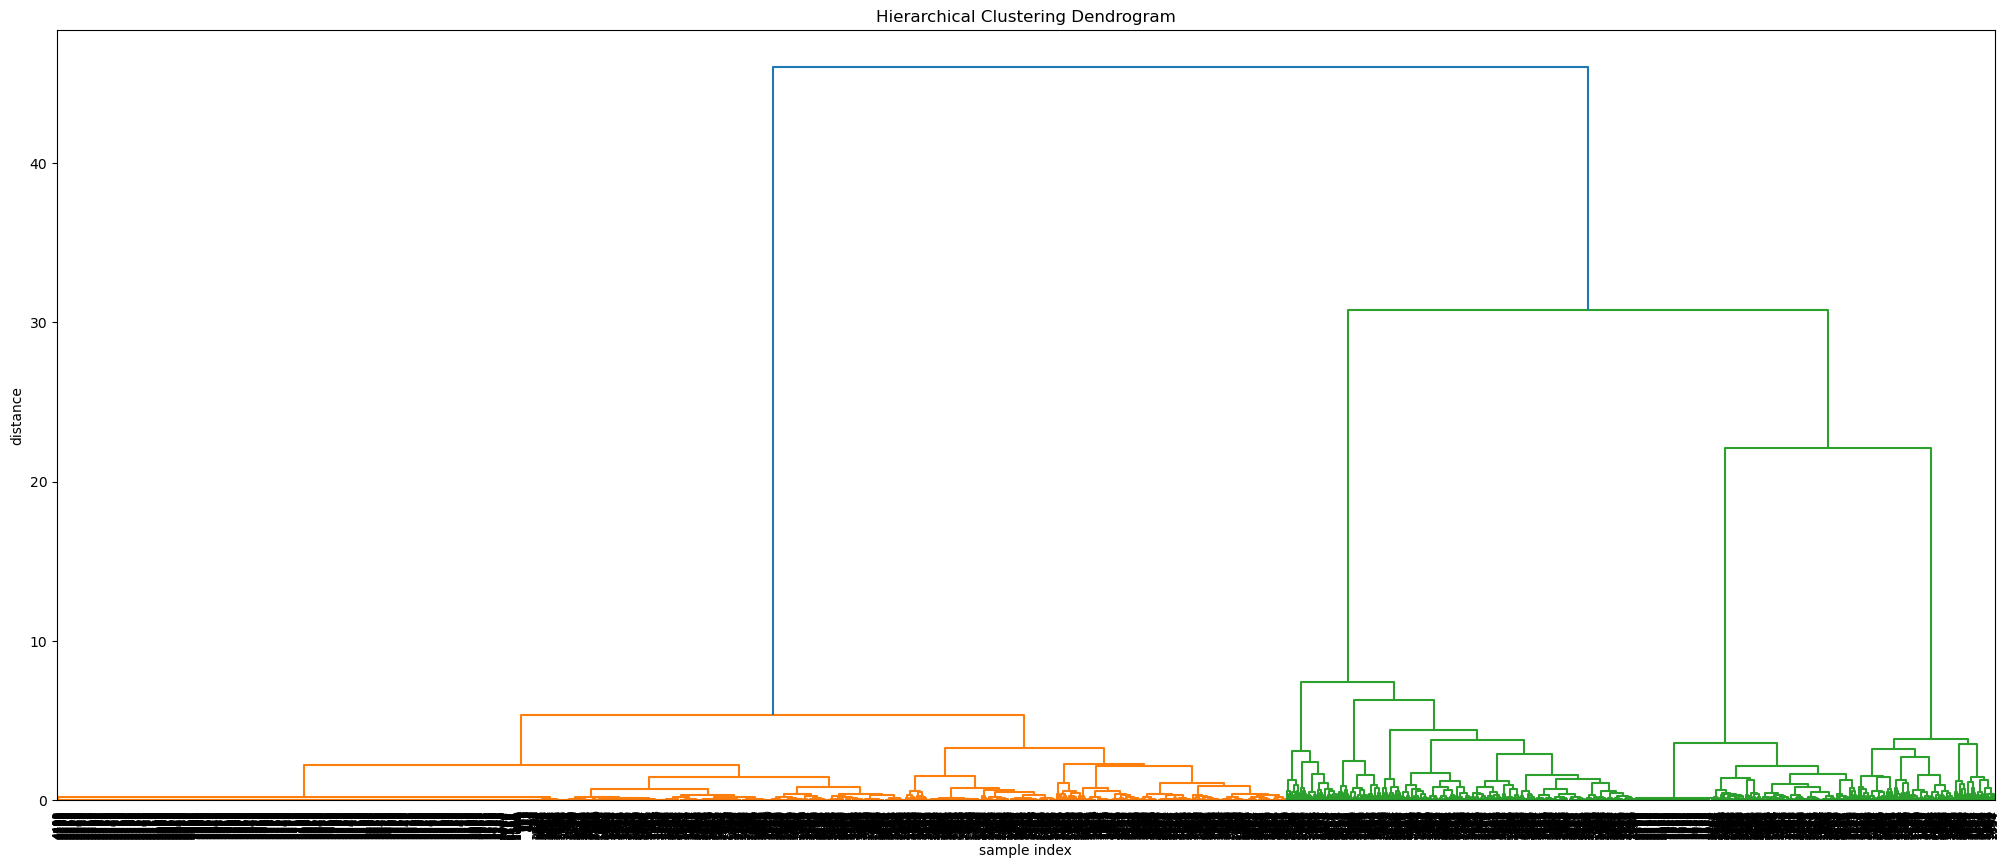

In [98]:
#Izbacivanje kolone Cluster
MinMaxPodaci.drop('Cluster', axis=1)

## hijararhijsko klasterovanje nad MinMaxPodacima
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np


Z = linkage(MinMaxPodaci, 'ward')

#dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [99]:
# sa prethodnog dendograma zakljucujemo da treba raditi klasterovanje sa 4 klastera
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=4)
clustering.fit(MinMaxPodaci)
MinMaxPodaci['Cluster'] = clustering.labels_
MinMaxPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT,Cluster
client_id,,,,,,,,,,
1,0.0,0.000000,0.036170,0.032820,0.086932,0.0,0.014929,0.007467,0.043357,1
2,1.0,0.276449,0.291269,0.298986,0.547975,0.0,0.190389,0.060285,0.402767,2
3,1.0,0.000000,0.045413,0.048921,0.120687,0.0,0.016396,0.001417,0.074409,3
4,0.0,0.000000,0.059898,0.058695,0.164715,0.0,0.020500,0.001900,0.089073,1
5,0.0,0.000000,0.111171,0.106425,0.086506,0.0,0.082656,0.163825,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
11333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1
11349,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3
11359,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1


In [110]:
#klaster 0
# Korisnici imaju 1 racun u banci i imaju veci broj transakcija odnosno suma vrednosti po svakoj koloni 
# u proseku je veca nego u klasteru 1.  Imaju velike prilive i odlive.
#Prilivi su vecinom u vidu depozita, a znacajno manje u vidu transfera. 
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['num_accounts'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['ACCOUNT TRANSFER'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['TRANSFER FROM ACCOUNT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==0]['CARD'].mean())

0.0
0.21389008672415083
0.22442333539088982
0.27402451100002195
0.2297050796075245
0.055613834989634583
0.05923530562387891


In [111]:
# klaster 1
# Imaju 1 racun u banci i imaju manji broj transakcija odnosno suma vrednosti po svakoj koloni 
# u proseku je manja nego u klasteru 0. Nemaju velike prilive i odlive.
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['num_accounts'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['ACCOUNT TRANSFER'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['TRANSFER FROM ACCOUNT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==1]['CARD'].mean())

0.0
0.031265551014983295
0.03206706210829305
0.03125963433605566
0.047822278806841756
0.016987304696011257
0.006587425659859219


In [112]:
#klaster 2
# Imaju 2 racuna u banci i imaju veci broj transakcija odnosno suma vrednosti po svakoj koloni 
# u proseku je veca nego u klasteru 3.
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['num_accounts'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['ACCOUNT TRANSFER'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['TRANSFER FROM ACCOUNT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==2]['CARD'].mean())

1.0
0.27459417378032314
0.29055951199763913
0.366636933637385
0.30581383307552135
0.056451714210775404
0.06128787636045158


In [113]:
# klaster 3
# Imaju 2 racuna u banci i imaju manji broj transakcija odnosno suma vrednosti po svakoj koloni 
# u proseku je manja nego u klasteru 2.
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['num_accounts'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['INCOME'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['EXPENDITURE'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['DEPOSIT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['ACCOUNT TRANSFER'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['TRANSFER FROM ACCOUNT'].mean())
print(MinMaxPodaci[MinMaxPodaci['Cluster']==3]['CARD'].mean())

1.0
0.0632783581685
0.06413182421446524
0.06335023331721967
0.09223787890612052
0.034296172129482196
0.011825206189257982


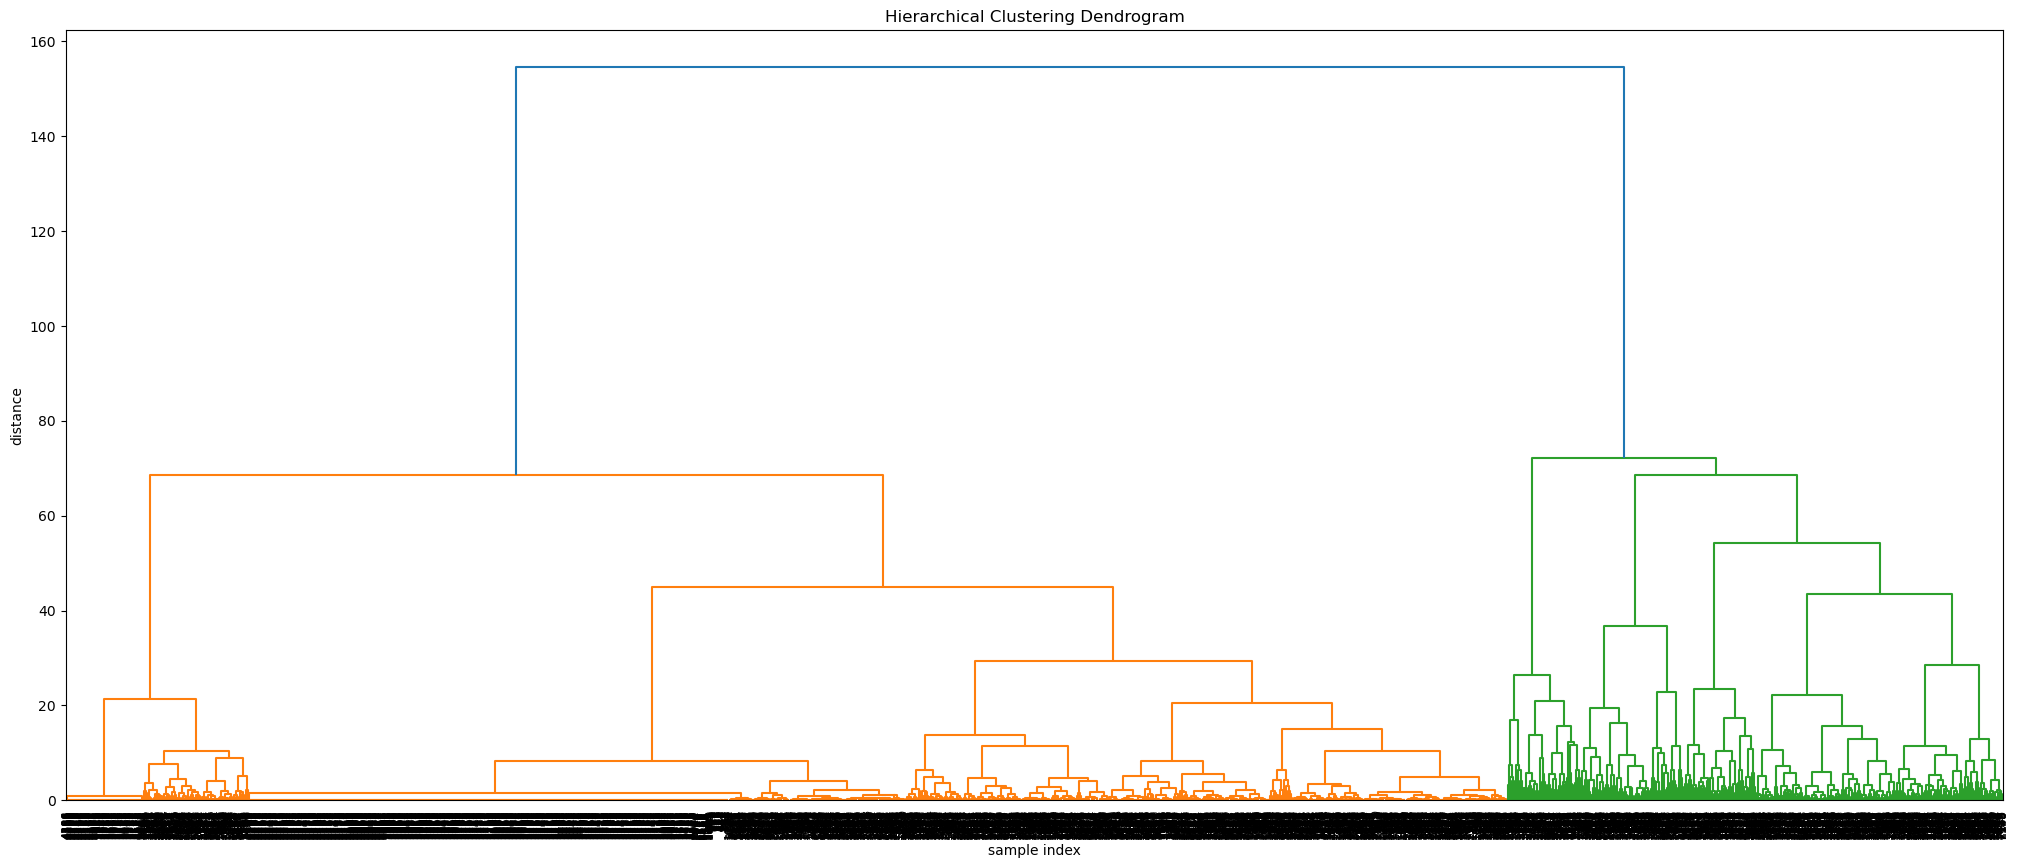

In [101]:
#Izbacivanje kolone Cluster
StandardScalerPodaci.drop('Cluster', axis=1)

## hijararhijsko klasterovanje nad StandardScalerPodacima
Z = linkage(StandardScalerPodaci, 'ward')

#dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [102]:
# sa prethodnog dendograma zakljucujemo da treba raditi klasterovanje sa 8,7 ili 5  klastera
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=8)
clustering.fit(StandardScalerPodaci)
StandardScalerPodaci['Cluster'] = clustering.labels_
StandardScalerPodaci

,num_accounts,CHOICE-TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE-OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT,Cluster
client_id,,,,,,,,,,
1,-0.489212,-0.346218,-0.501554,-0.518887,-0.152925,-0.273029,-0.536725,-0.621797,0.091647,1
2,2.044105,2.148899,1.552831,1.714401,3.003518,-0.273029,1.131592,-0.307324,3.631847,2
3,2.044105,-0.346218,-0.427115,-0.383789,0.078173,-0.273029,-0.522776,-0.657820,0.397511,4
4,-0.489212,-0.346218,-0.310462,-0.301783,0.379601,-0.273029,-0.483754,-0.654944,0.541953,1
5,-0.489212,-0.346218,0.102454,0.098702,-0.155838,-0.273029,0.107236,0.309147,-0.335419,1
...,...,...,...,...,...,...,...,...,...,...
11333,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,6
11349,2.044105,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,4
11359,-0.489212,-0.346218,-0.792839,-0.794267,-0.748087,-0.273029,-0.678679,-0.666256,-0.335419,6
